# EDA on the Dataset for Cryptocurrency Lquidity Prediction

### 1. imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Loading the datasets

In [8]:
# there are two datasets provided to us
# loading dataset 1: 
df1 = pd.read_csv('../data/coin_gecko_2022-03-16.csv')
df1.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [9]:
df2 = pd.read_csv('../data/coin_gecko_2022-03-17.csv')
df2.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17


In [10]:
# We can merge these two datasets:
df = pd.concat([df1, df2], ignore_index=True)
df.shape

(1000, 9)

### 3. Handling Null values

In [11]:
df.isnull().sum()

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

In [14]:
# We can fill null values with the mode of the column
df['1h'].fillna(df['1h'].mode()[0], inplace=True)
df['24h'].fillna(df['24h'].mode()[0], inplace=True)
df['7d'].fillna(df['7d'].mode()[0], inplace=True)
df['24h_volume'].fillna(df['24h_volume'].mode()[0], inplace=True)
df.isnull().sum()

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64

In [15]:
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [16]:
df.describe()


,price,1h,24h,7d,24h_volume,mkt_cap
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,6.561060e+02,0.009662,0.023571,0.023370,2.872914e+08,3.755304e+09
std,4.584655e+03,0.026850,0.059128,0.228869,2.760291e+09,3.803783e+10
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07
25%,1.940547e-01,0.001000,0.001000,-0.040250,1.695034e+06,1.157776e+08
50%,1.095000e+00,0.006000,0.015000,0.000000,8.232836e+06,2.120036e+08
75%,7.232500e+00,0.019000,0.035000,0.036000,3.923430e+07,5.948436e+08
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11


In [22]:
df.coin.nunique()
# there are 506 unique coins in the data set

506

In [25]:
### Converting 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   coin        1000 non-null   object        
 1   symbol      1000 non-null   object        
 2   price       1000 non-null   float64       
 3   1h          1000 non-null   float64       
 4   24h         1000 non-null   float64       
 5   7d          1000 non-null   float64       
 6   24h_volume  1000 non-null   float64       
 7   mkt_cap     1000 non-null   float64       
 8   date        1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 70.4+ KB


In [30]:
num_features = df.columns[df.dtypes != 'object']
print("Numerical Features:", num_features.tolist())

Numerical Features: ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date']


In [32]:
df[num_features].corr()

,price,1h,24h,7d,24h_volume,mkt_cap,date
price,1.000000,-0.000824,-0.008429,0.015376,0.175960,0.366709,0.000725
1h,-0.000824,1.000000,0.437391,0.132215,-0.006182,0.004096,-0.334548
24h,-0.008429,0.437391,1.000000,0.474862,-0.009031,-0.007568,-0.086381
7d,0.015376,0.132215,0.474862,1.000000,0.015607,-0.001049,-0.067374
24h_volume,0.175960,-0.006182,-0.009031,0.015607,1.000000,0.599806,-0.013923
mkt_cap,0.366709,0.004096,-0.007568,-0.001049,0.599806,1.000000,0.000858
date,0.000725,-0.334548,-0.086381,-0.067374,-0.013923,0.000858,1.000000


📊 Key insights from the correlations:
✅ 1️⃣ Price is moderately correlated with market cap (≈ 0.36)

This makes sense: higher price generally means higher market cap, but it’s not perfectly correlated because market cap = price × circulating supply.

So circulating supply varies across coins.

✅ 2️⃣ Price has small positive correlation with 24h_volume (≈ 0.17)

Coins with higher prices slightly tend to have higher trading volume.

But the relationship isn’t very strong → some high-priced coins might still have low trading activity.

✅ 3️⃣ Market cap and 24h_volume are strongly correlated (≈ 0.59)

Coins with higher market caps generally have higher trading volume.

This shows liquidity: popular large-cap coins are traded more actively.

✅ 4️⃣ 24h and 7d changes are moderately correlated (≈ 0.47)

Coins that increased/decreased over 24h often continued in the same trend over 7 days.

Suggests some momentum effect over short-to-mid term.

✅ 5️⃣ 1h change doesn’t correlate much with anything else

Correlation with price, volume, market cap, and longer-term changes is close to zero.

Indicates that short-term hourly volatility is mostly random / noise.

✅ 6️⃣ Date shows small negative correlation with 1h (-0.33) and very weak with others

Possibly because dataset is sorted over time, and certain patterns in hourly change appeared at certain dates.

But since date correlation is weak, time trend effect isn’t strong overall.

⚡ Overall summary:
Larger market cap coins tend to have higher trading volume.

Price itself isn’t strongly tied to volume or volatility over short time frames.

Momentum effect exists: 24h and 7d price changes move together.

Short-term (1h) movements are mostly independent and noisy.

<Axes: >

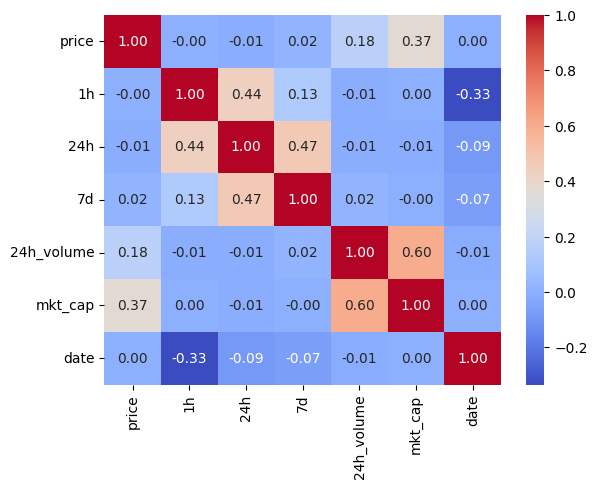

In [33]:
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   coin        1000 non-null   object        
 1   symbol      1000 non-null   object        
 2   price       1000 non-null   float64       
 3   1h          1000 non-null   float64       
 4   24h         1000 non-null   float64       
 5   7d          1000 non-null   float64       
 6   24h_volume  1000 non-null   float64       
 7   mkt_cap     1000 non-null   float64       
 8   date        1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 70.4+ KB


<Axes: xlabel='date'>

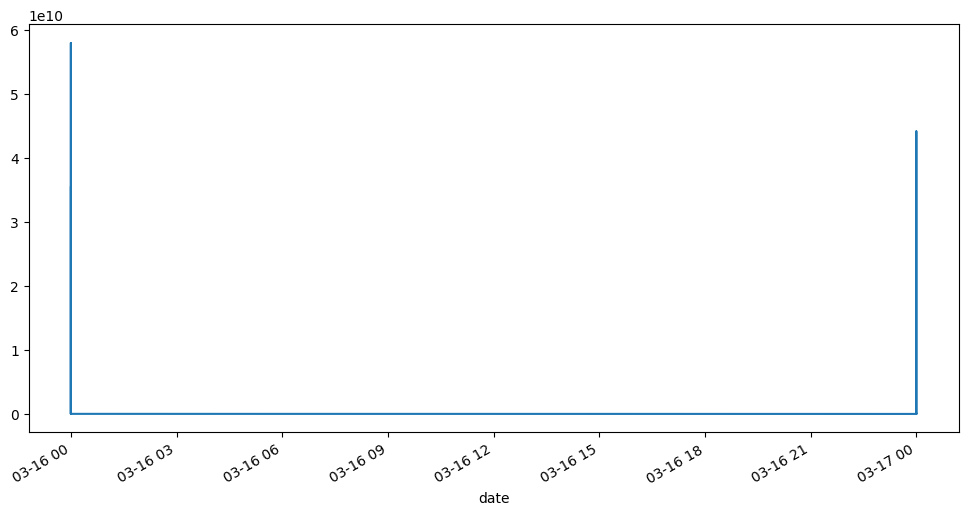

In [46]:
df.sort_values('date', inplace=True)

df.set_index('date')['24h_volume'].plot(figsize=(12,6))

<Axes: xlabel='mkt_cap', ylabel='24h_volume'>

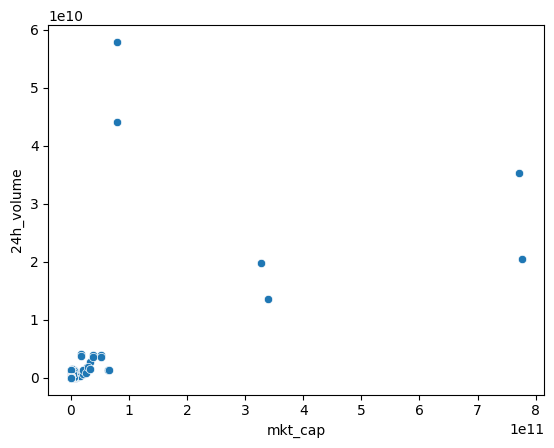

In [47]:
import seaborn as sns
sns.scatterplot(x='mkt_cap', y='24h_volume', data=df)


<Axes: xlabel='mkt_cap', ylabel='24h_volume'>

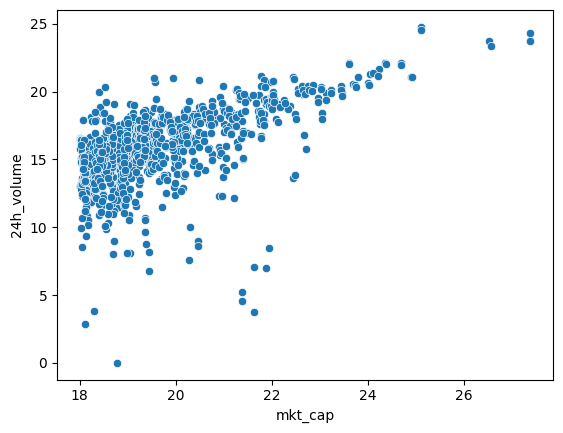

In [48]:
sns.scatterplot(x=np.log1p(df['mkt_cap']), y=np.log1p(df['24h_volume']))


<Axes: xlabel='24h_volume', ylabel='1h'>

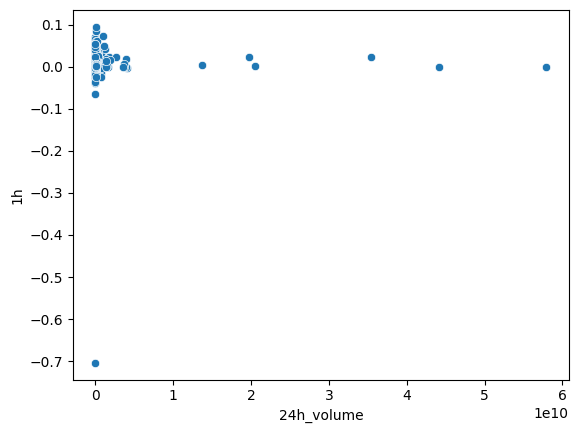

In [52]:
sns.scatterplot(x=df['24h_volume'],y=df['1h'])

<Axes: xlabel='date', ylabel='24h_volume'>

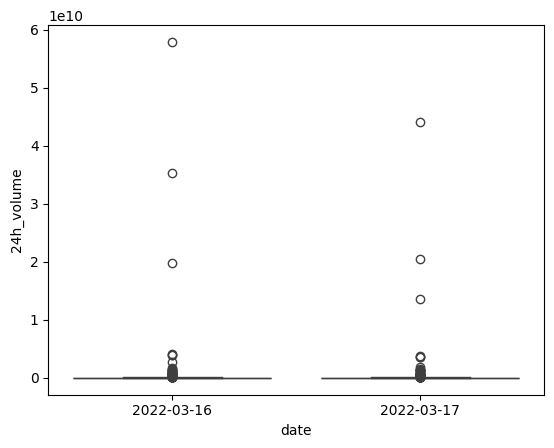

In [ ]:
sns.boxplot(x='date', y='24h_volume', data=df)

In [61]:
# Calculate Q1 and Q3
Q1 = df['24h_volume'].quantile(0.25)
Q3 = df['24h_volume'].quantile(0.75)

# IQR
IQR = Q3 - Q1

# Define lower & upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[df['24h_volume'] > upper_bound]
print("Outliers: \n", outliers[['coin', '24h_volume']])
print("Number of outliers:", len(outliers))
print(outliers['coin'].nunique())


Outliers: 
                              coin    24h_volume
0                         Bitcoin  3.539076e+10
335                  Polkastarter  2.001325e+08
268  Kyber Network Crystal Legacy  1.913018e+08
254               Origin Protocol  1.824785e+08
396             My Neighbor Alice  9.930001e+07
..                            ...           ...
693               ConstitutionDAO  1.489658e+08
692                     FLEX Coin  1.321112e+09
684                          Nano  2.726332e+08
655                         STEPN  1.358531e+09
676         Ethereum Name Service  1.308025e+08

[147 rows x 2 columns]
Number of outliers: 147
83


✅ Insights:
1️⃣ Liquidity is highly concentrated
A relatively small number of coins (≈ 83 unique coins) dominate the trading volume.

These coins have trading activity so high that they are statistical outliers.

This is very common in crypto: top coins like Bitcoin, Ethereum, and a few trending coins dominate volume.

2️⃣ Different kinds of outliers
From your list, you can see:

Established coins like Bitcoin (with extremely high volume, e.g., 3.5e10).

Mid-tier coins like Kyber Network, Polkastarter, FLEX Coin, etc., that had spikes in trading activity.

Some niche or trending coins (e.g., ConstitutionDAO, STEPN) → likely driven by short-term hype or events.

This shows that outliers can come from:

Fundamentally large coins.

Short-lived volume spikes due to news/hype.

3️⃣ Heavy-tailed distribution confirmed
The fact that you got 147 outliers shows the volume distribution is very skewed:

A long tail of coins with low volume.

A small group with very high volume.